In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# train 데이터 불러오기
train_data = pd.read_csv("train.csv")

# test 데이터 불러오기
test_data = pd.read_csv("test.csv")

# international_trade 데이터 불러오기
international_trade_data = pd.read_csv("international_trade.csv")

# 데이터프레임 확인
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print("\nInternational Trade Data:")
print(international_trade_data.head())

Train Data:
                ID   timestamp item corporation location  supply(kg)  \
0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
3  TG_A_J_20190104  2019-01-04   TG           A        J     25000.0   
4  TG_A_J_20190105  2019-01-05   TG           A        J     32352.0   

   price(원/kg)  
0          0.0  
1          0.0  
2       1728.0  
3       1408.0  
4       1250.0  

Test Data:
                ID   timestamp item corporation location
0  TG_A_J_20230304  2023-03-04   TG           A        J
1  TG_A_J_20230305  2023-03-05   TG           A        J
2  TG_A_J_20230306  2023-03-06   TG           A        J
3  TG_A_J_20230307  2023-03-07   TG           A        J
4  TG_A_J_20230308  2023-03-08   TG           A        J

International Trade Data:
        기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


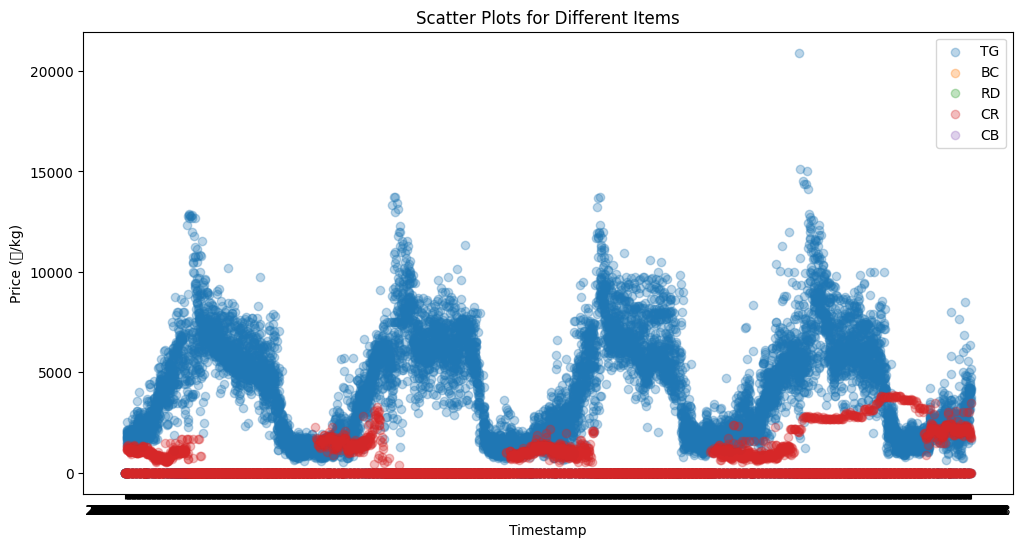

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: 특정 품목에 대한 산점도 시각화 함수
def plot_scatter(item_data, item_name):
    plt.scatter(item_data['timestamp'], item_data['price(원/kg)'], alpha=0.3, label=item_name)

# 특정 품목(TG)에 대한 산점도 시각화
plt.figure(figsize=(12, 6))
plot_scatter(train_data[train_data['item'] == 'TG'], 'TG')

# 다른 품목들에 대한 산점도 시각화
other_items = ['BC', 'RD', 'CR', 'CB']

for item in other_items:
    item_data = train_data[train_data['item'] == item]
    plot_scatter(item_data, item)

# 그래프 세부 설정
plt.title("Scatter Plots for Different Items")
plt.xlabel("Timestamp")
plt.ylabel("Price (원/kg)")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


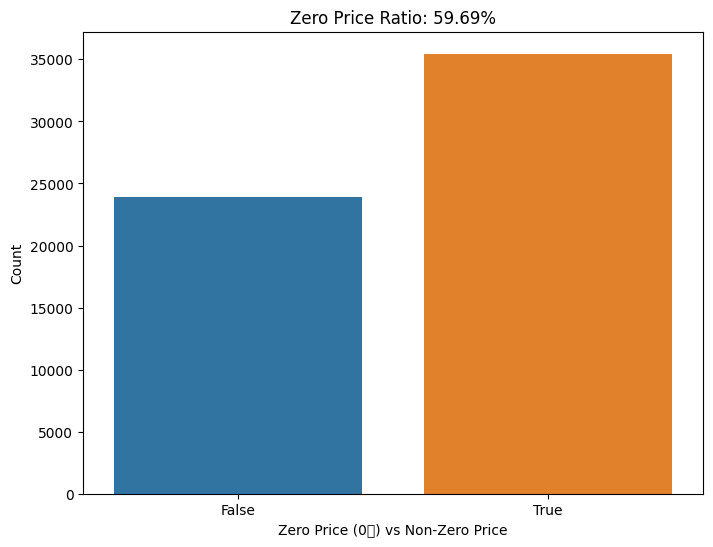

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 데이터에서 가격이 0원인 비율 계산
zero_price_ratio = (train_data['price(원/kg)'] == 0).mean() * 100

# 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x=(train_data['price(원/kg)'] == 0))
plt.title(f"Zero Price Ratio: {zero_price_ratio:.2f}%")
plt.xlabel("Zero Price (0원) vs Non-Zero Price")
plt.ylabel("Count")
plt.show()


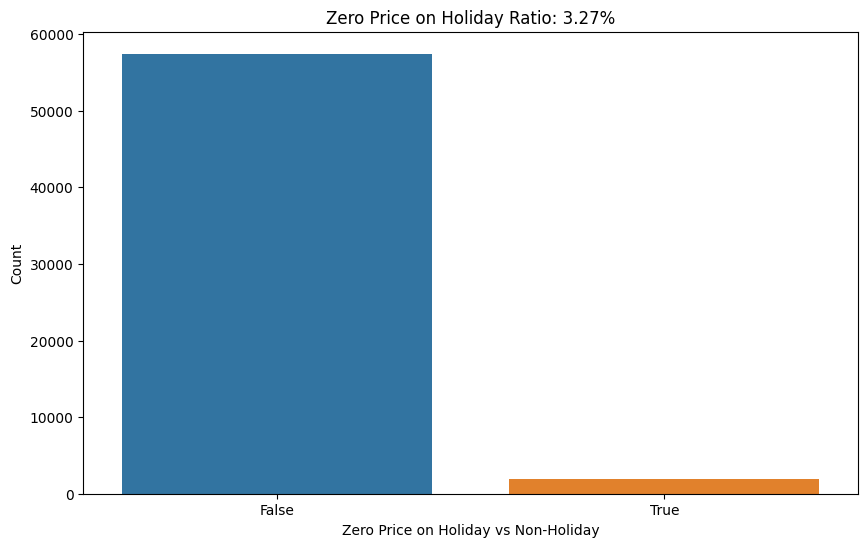

전체 기간 중 price가 0인 비율: 59.69%
price가 0이면서 공휴일인 비율: 3.27%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# train 데이터 불러오기
train_data = pd.read_csv('train.csv')
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# 대한민국의 법정 공휴일 정보를 포함하는 DataFrame 생성
holidays_korea = pd.DataFrame({
    'date': pd.to_datetime(['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01',
                            '2019-05-05', '2019-05-06', '2019-05-12', '2019-06-06', '2019-08-15',
                            '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09',
                            '2019-12-25', '2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26',
                            '2020-03-01', '2020-04-30', '2020-05-01', '2020-05-05', '2020-06-06',
                            '2020-08-15', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09',
                            '2020-12-25', '2021-01-01', '2021-02-11', '2021-02-12', '2021-02-13',
                            '2021-03-01', '2021-05-05', '2021-05-19', '2021-09-20', '2021-09-21',
                            '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25', '2022-01-01',
                            '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05',
                            '2022-05-14', '2022-06-06', '2022-08-15', '2022-09-10', '2022-10-01',
                            '2022-10-02', '2022-10-03', '2022-10-09', '2022-12-25', '2023-01-01',
                            '2023-01-21', '2023-01-22', '2023-01-23', '2023-03-01', '2023-05-05',
                            '2023-05-03', '2023-06-06', '2023-08-15', '2023-09-29', '2023-09-30', '2023-10-03']),
    'is_holiday': 1
})

# train 데이터와 병합
train_data_with_holidays = pd.merge(train_data, holidays_korea, left_on='timestamp', right_on='date', how='left')
train_data_with_holidays['is_holiday'].fillna(0, inplace=True)  # 공휴일이 아닌 경우 0으로 채우기

# price가 0인 경우의 비율 계산
zero_price_ratio = (train_data_with_holidays['price(원/kg)'] == 0).mean() * 100

# price가 0이면서 공휴일인 경우의 비율 계산
zero_price_holiday_ratio = ((train_data_with_holidays['price(원/kg)'] == 0) & (train_data_with_holidays['is_holiday'] == 1)).mean() * 100

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x=((train_data_with_holidays['price(원/kg)'] == 0) & (train_data_with_holidays['is_holiday'] == 1)))
plt.title(f"Zero Price on Holiday Ratio: {zero_price_holiday_ratio:.2f}%")
plt.xlabel("Zero Price on Holiday vs Non-Holiday")
plt.ylabel("Count")
plt.show()

print(f"전체 기간 중 price가 0인 비율: {zero_price_ratio:.2f}%")
print(f"price가 0이면서 공휴일인 비율: {zero_price_holiday_ratio:.2f}%")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


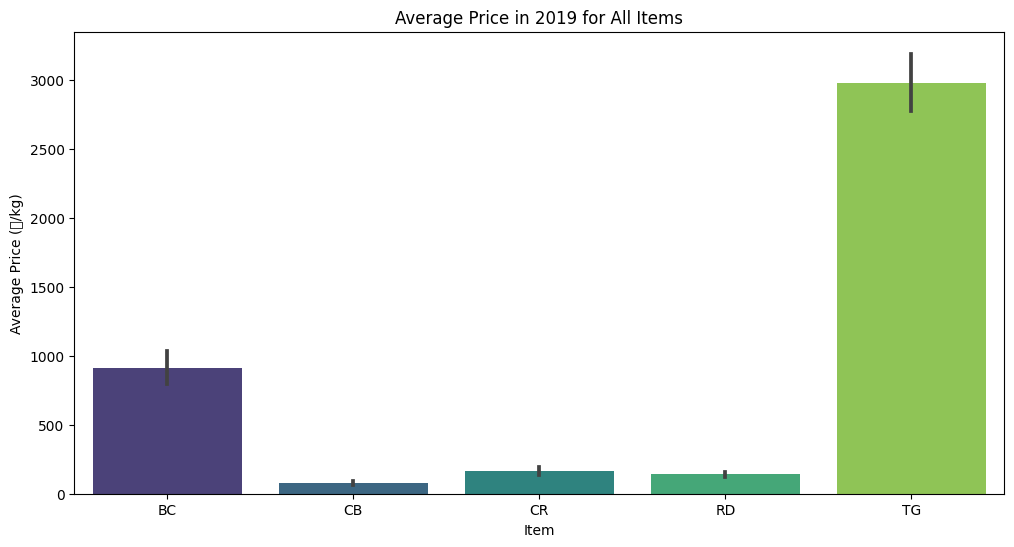

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


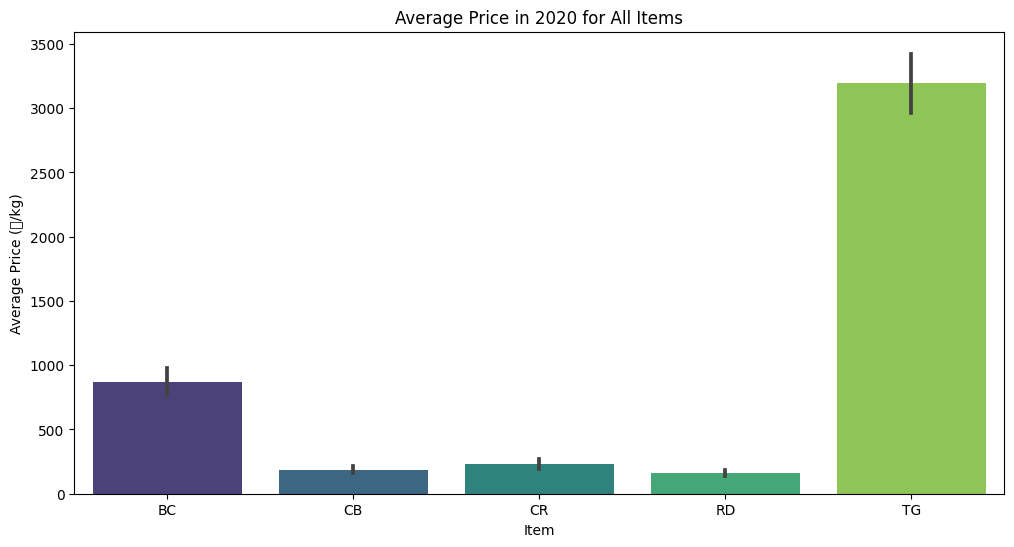

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


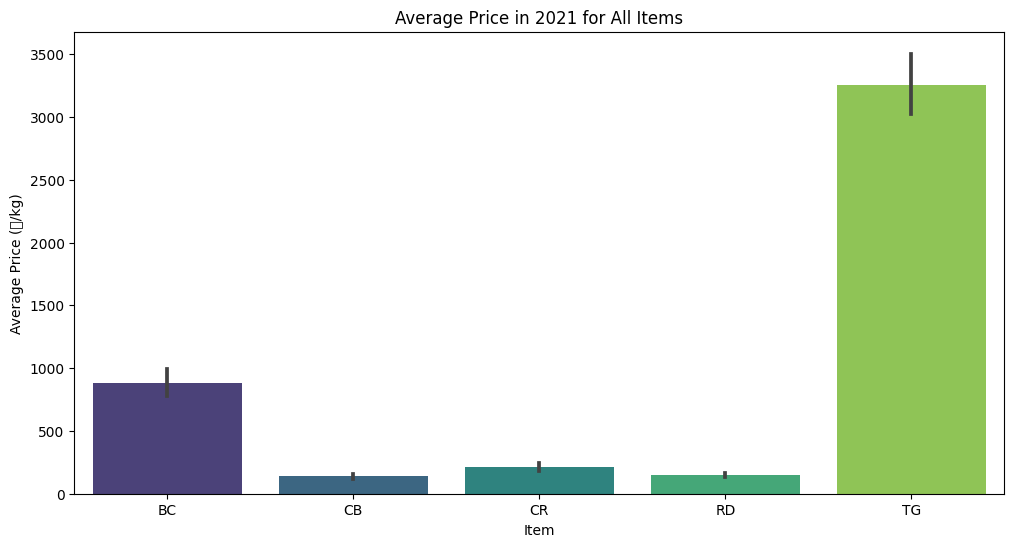

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


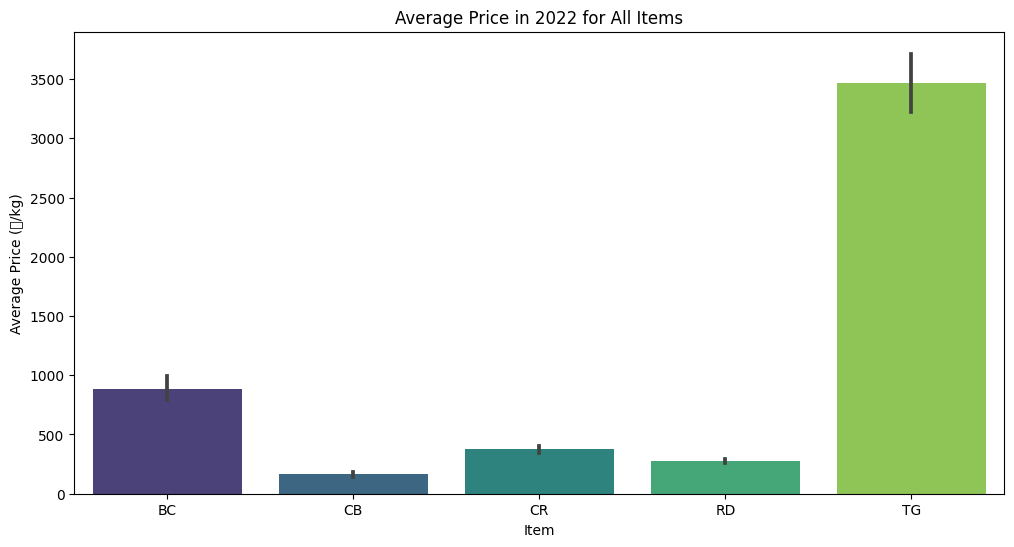

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


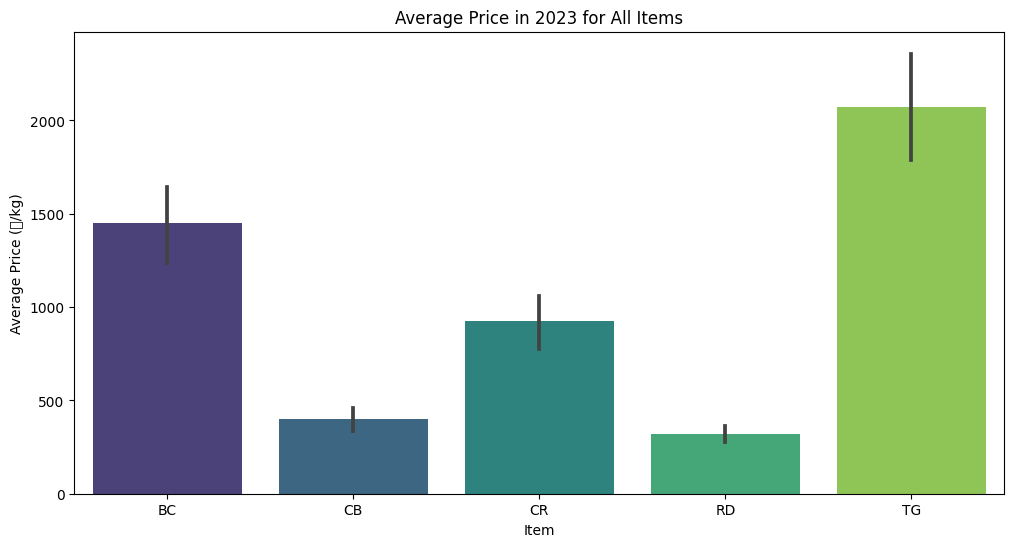

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train 데이터 불러오기
train_data = pd.read_csv('train.csv')
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# 필요한 연도와 품목 선택
selected_years = [2019, 2020, 2021, 2022, 2023]
selected_items = ['TG', 'BC', 'CB', 'CR', 'RD']
filtered_data = train_data[(train_data['timestamp'].dt.year.isin(selected_years)) & (train_data['item'].isin(selected_items))]

# 연도 및 품목별 평균 price 계산
average_price_by_year_item = filtered_data.groupby(['timestamp', 'item'])['price(원/kg)'].mean().reset_index()

# 2019년도만 필터링하여 시각화
average_price_2019 = average_price_by_year_item[average_price_by_year_item['timestamp'].dt.year == 2019]

plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_2019, x='item', y='price(원/kg)', palette='viridis')
plt.title('Average Price in 2019 for All Items')
plt.xlabel('Item')
plt.ylabel('Average Price (원/kg)')
plt.show()

# 각 연도별로 막대그래프 시각화
years = [2020, 2021, 2022, 2023]

for year in years:
    average_price_year = average_price_by_year_item[average_price_by_year_item['timestamp'].dt.year == year]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=average_price_year, x='item', y='price(원/kg)', palette='viridis')
    plt.title(f'Average Price in {year} for All Items')
    plt.xlabel('Item')
    plt.ylabel('Average Price (원/kg)')
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


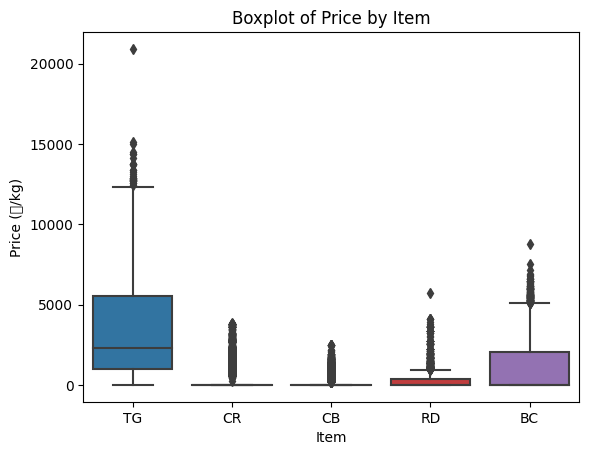

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# train_data에서 'item'과 'price(원/kg)' 열을 선택
sns.boxplot(x='item', y='price(원/kg)', data=train_data)

# 그래프 제목과 축 레이블 추가
plt.title('Boxplot of Price by Item')
plt.xlabel('Item')
plt.ylabel('Price (원/kg)')

# 그래프 표시
plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


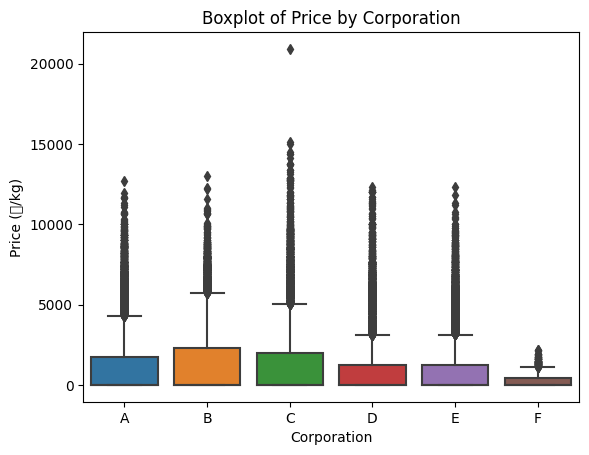

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# train_data에서 'corporation'과 'price(원/kg)' 열을 선택
sns.boxplot(x='corporation', y='price(원/kg)', data=train_data)

# 그래프 제목과 축 레이블 추가
plt.title('Boxplot of Price by Corporation')
plt.xlabel('Corporation')
plt.ylabel('Price (원/kg)')

# 그래프 표시
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


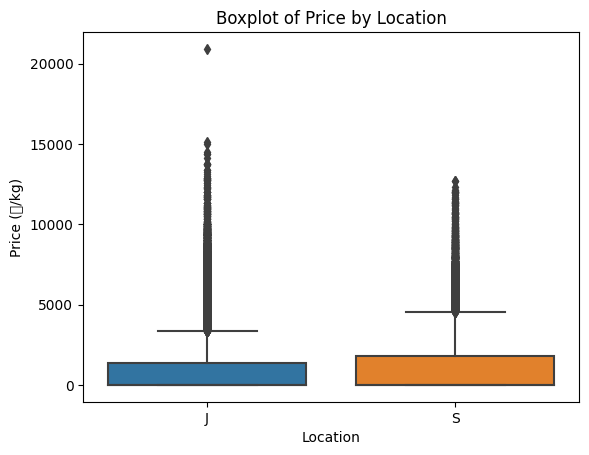

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# train_data에서 'location'과 'price(원/kg)' 열을 선택
sns.boxplot(x='location', y='price(원/kg)', data=train_data)

# 그래프 제목과 축 레이블 추가
plt.title('Boxplot of Price by Location')
plt.xlabel('Location')
plt.ylabel('Price (원/kg)')

# 그래프 표시
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


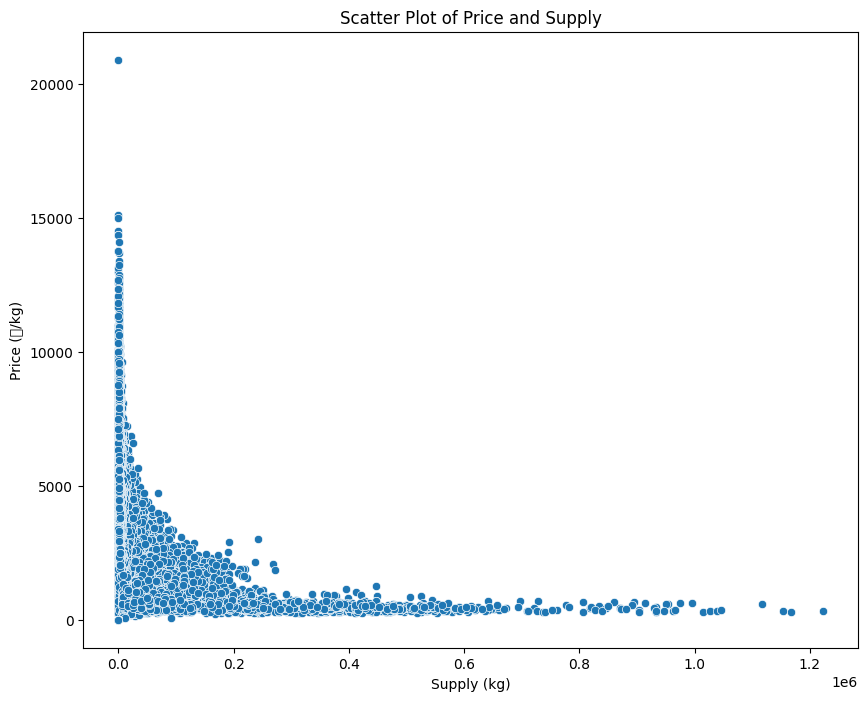

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data, x='supply(kg)', y='price(원/kg)')

# 그래프 제목과 축 레이블 추가
plt.title('Scatter Plot of Price and Supply')
plt.xlabel('Supply (kg)')
plt.ylabel('Price (원/kg)')

# 그래프 표시
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


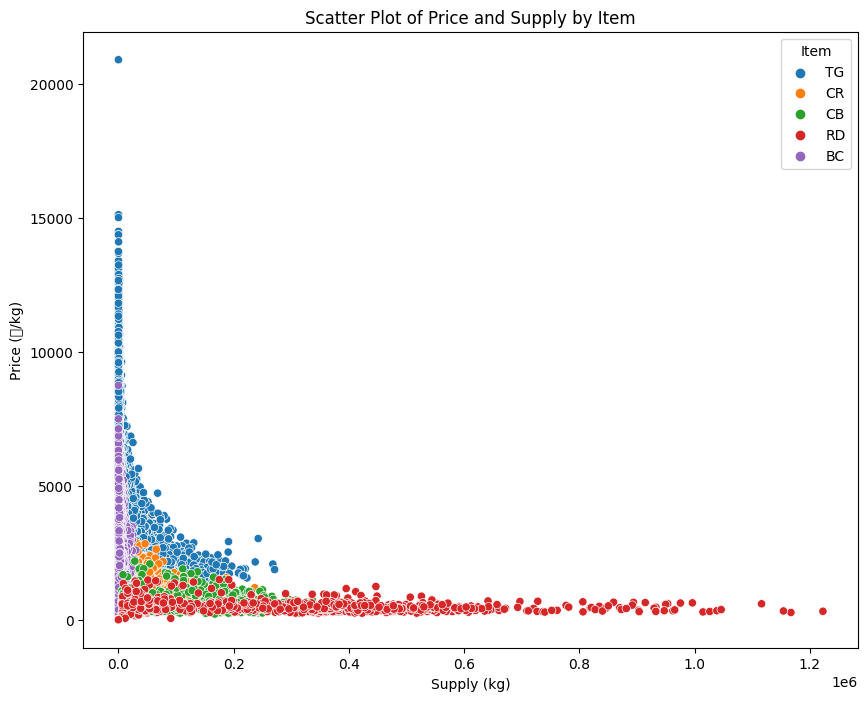

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data, x='supply(kg)', y='price(원/kg)', hue='item')

# 그래프 제목과 축 레이블 추가
plt.title('Scatter Plot of Price and Supply by Item')
plt.xlabel('Supply (kg)')
plt.ylabel('Price (원/kg)')

# 범례 추가
plt.legend(title='Item')

# 그래프 표시
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


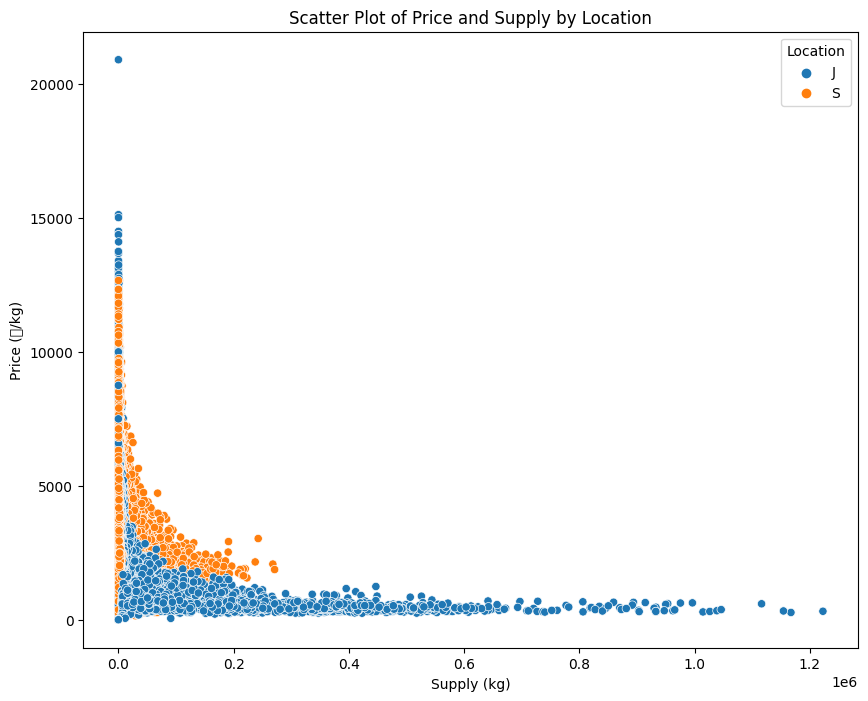

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_data, x='supply(kg)', y='price(원/kg)', hue='location')

# 그래프 제목과 축 레이블 추가
plt.title('Scatter Plot of Price and Supply by Location')
plt.xlabel('Supply (kg)')
plt.ylabel('Price (원/kg)')

# 범례 추가
plt.legend(title='Location')

# 그래프 표시
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


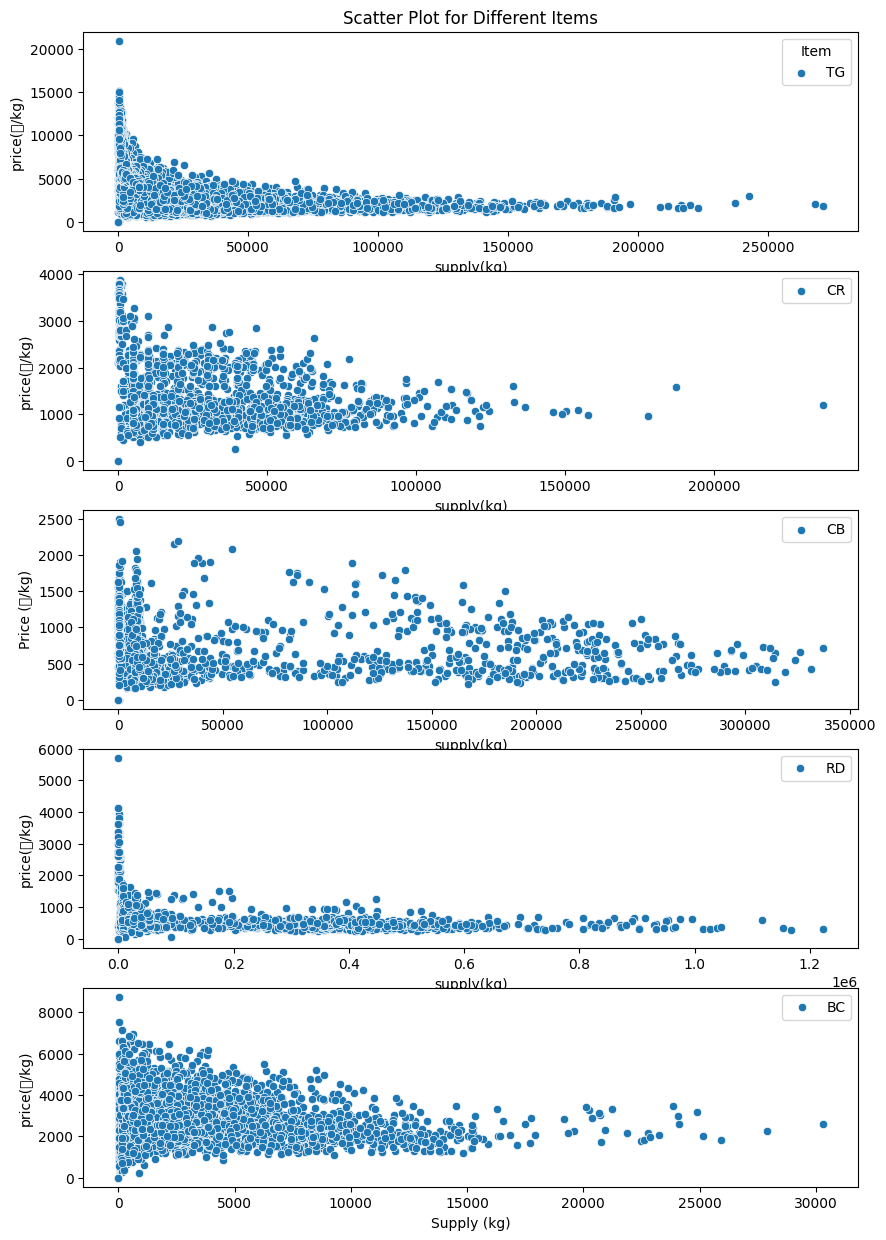

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10, 15))
for i, item in enumerate(train_data['item'].unique()):
    sns.scatterplot(data=train_data[train_data['item'] == item], x='supply(kg)', y='price(원/kg)', ax=axes[i], label=item)

# 각 subplot에 제목 추가
axes[0].set_title('Scatter Plot for Different Items')
axes[-1].set_xlabel('Supply (kg)')
axes[2].set_ylabel('Price (원/kg)')

# 범례 추가
axes[0].legend(title='Item')

# 그래프 표시
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


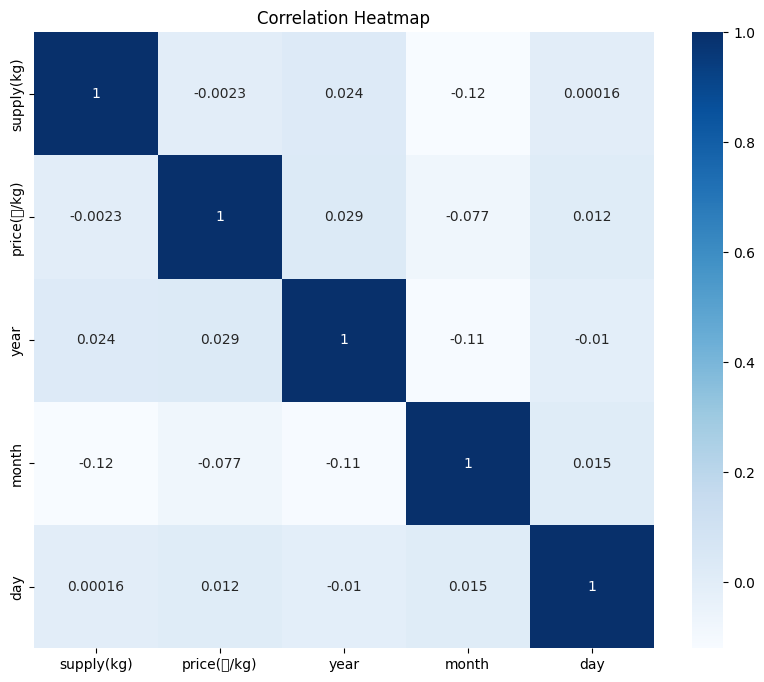

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# timestamp를 기반으로 year, month, day를 추출
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['year'] = train_data['timestamp'].dt.year
train_data['month'] = train_data['timestamp'].dt.month
train_data['day'] = train_data['timestamp'].dt.day

# 필요한 열만 선택
selected_columns = ['supply(kg)', 'price(원/kg)', 'year', 'month', 'day']
selected_data = train_data[selected_columns]

# 상관 관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


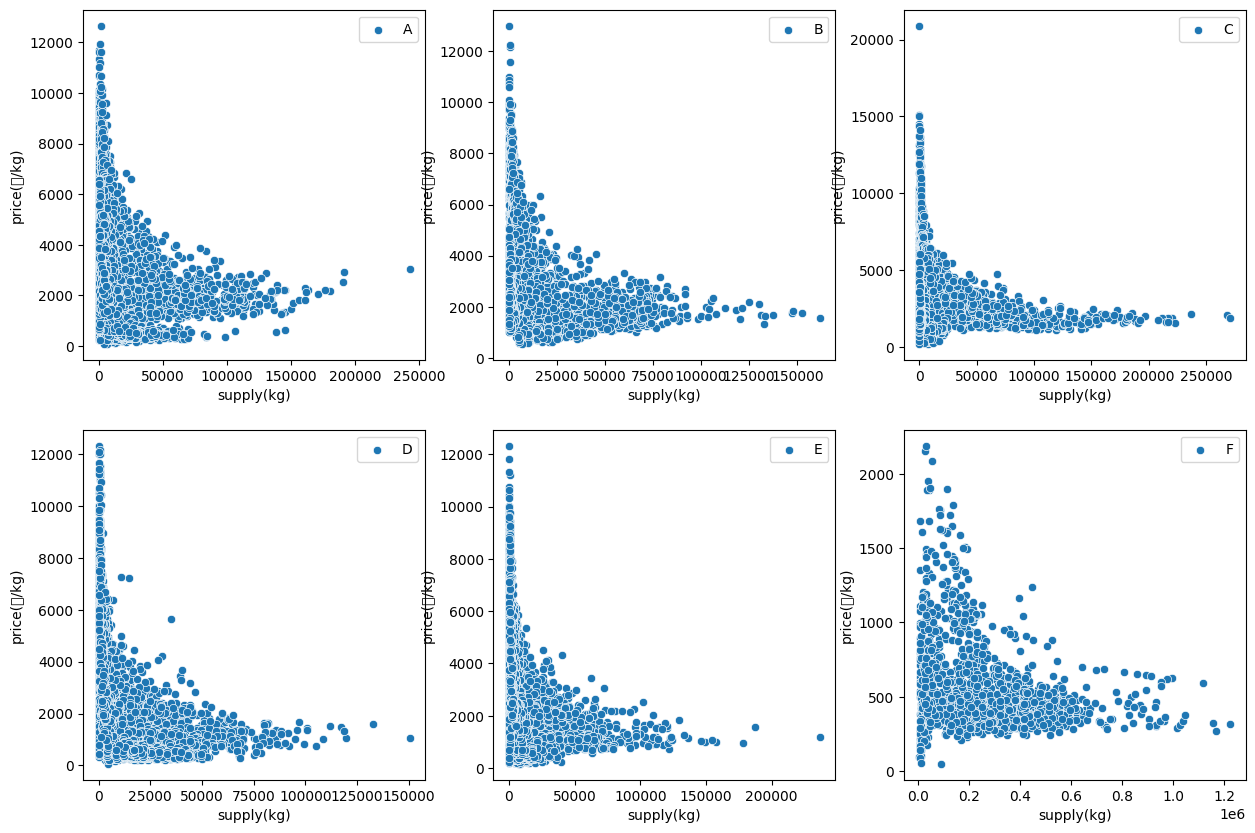

In [ ]:
# train_data에서 supply와 price가 0이 아닌 데이터만 선택
sup_notzero = train_data[(train_data['supply(kg)'] != 0) & (train_data['price(원/kg)'] != 0)]

# 법인 코드 리스트 정의
corp = ['A', 'B', 'C', 'D', 'E', 'F']

# 산점도 그리기
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, corporation in enumerate(corp):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=sup_notzero[sup_notzero['corporation'] == corporation],
                    x='supply(kg)', y='price(원/kg)', ax=axes[row, col], label=corporation)

plt.show()

<ipython-input-21-56cc4d767eb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_data['year'] = tg_data['timestamp'].dt.year
<ipython-input-21-56cc4d767eb9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_data['month'] = tg_data['timestamp'].dt.month
<ipython-input-21-56cc4d767eb9>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_tg, ci=None, palette='viridis')


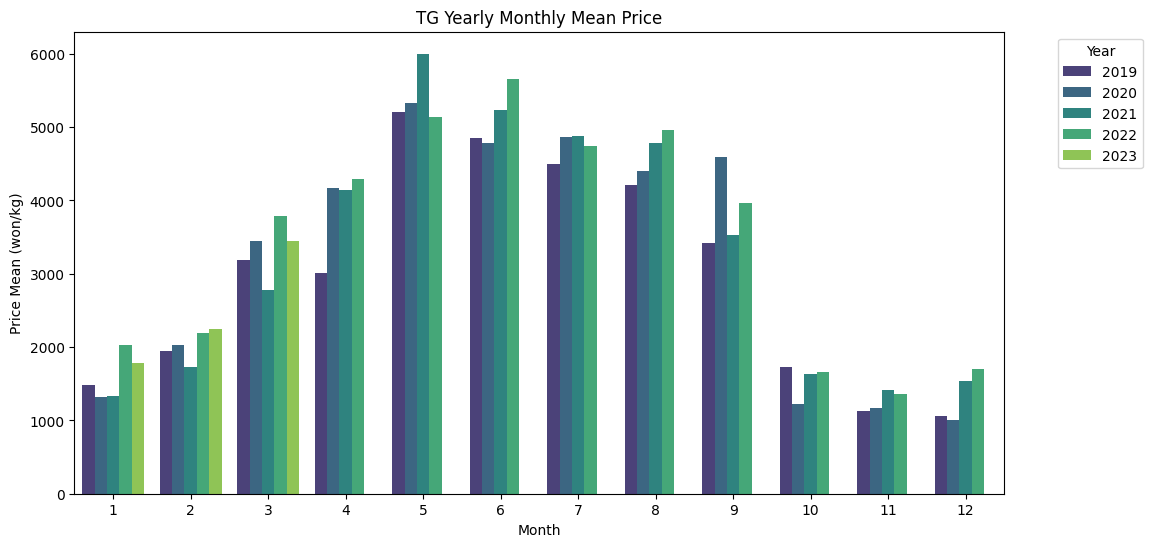

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TG 품목에 대한 2019년부터 2023년까지의 데이터 선택
tg_data = train_data[(train_data['item'] == 'TG') & (train_data['timestamp'].dt.year >= 2019)]

# timestamp에서 연도와 월 정보 추출
tg_data['year'] = tg_data['timestamp'].dt.year
tg_data['month'] = tg_data['timestamp'].dt.month

# 연도별 월별 price(원/kg) 평균 계산
monthly_mean_tg = tg_data.groupby(['year', 'month'])['price(원/kg)'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_tg, ci=None, palette='viridis')
plt.title('TG Yearly Monthly Mean Price')
plt.xlabel('Month')
plt.ylabel('Price Mean (won/kg)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-22-2f504e5f1987>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_data['year'] = cr_data['timestamp'].dt.year
<ipython-input-22-2f504e5f1987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_data['month'] = cr_data['timestamp'].dt.month
<ipython-input-22-2f504e5f1987>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_cr, ci=None, palette='viridis')


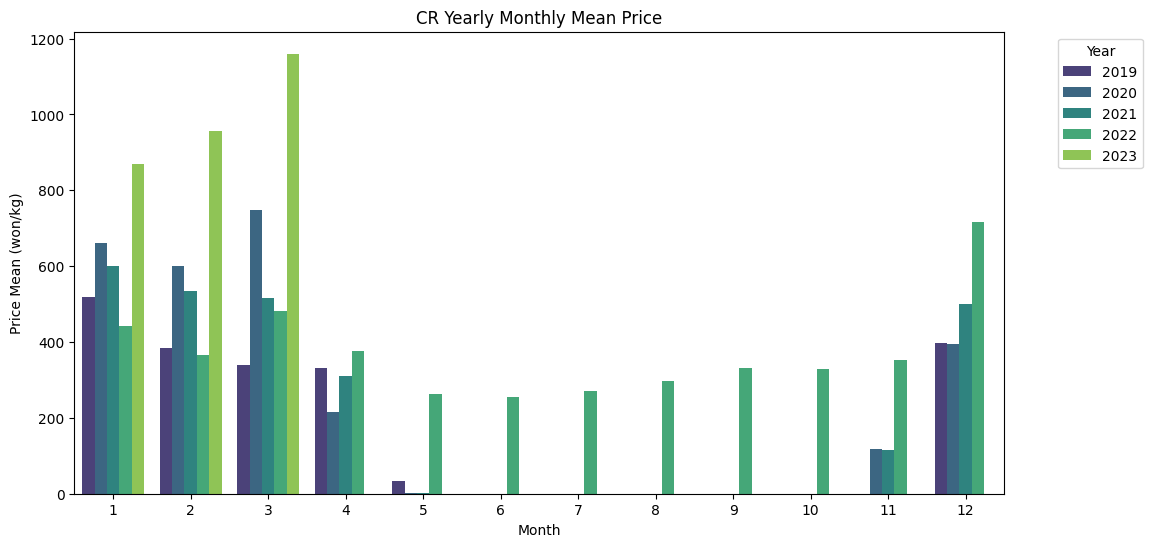

In [ ]:
# CR 품목에 대한 2019년부터 2023년까지의 데이터 선택
cr_data = train_data[(train_data['item'] == 'CR') & (train_data['timestamp'].dt.year >= 2019)]

# timestamp에서 연도와 월 정보 추출
cr_data['year'] = cr_data['timestamp'].dt.year
cr_data['month'] = cr_data['timestamp'].dt.month

# 연도별 월별 price(원/kg) 평균 계산
monthly_mean_cr = cr_data.groupby(['year', 'month'])['price(원/kg)'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_cr, ci=None, palette='viridis')
plt.title('CR Yearly Monthly Mean Price')
plt.xlabel('Month')
plt.ylabel('Price Mean (won/kg)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-23-0747a2824c09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb_data['year'] = cb_data['timestamp'].dt.year
<ipython-input-23-0747a2824c09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb_data['month'] = cb_data['timestamp'].dt.month
<ipython-input-23-0747a2824c09>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_cb, ci=None, palette='viridis')


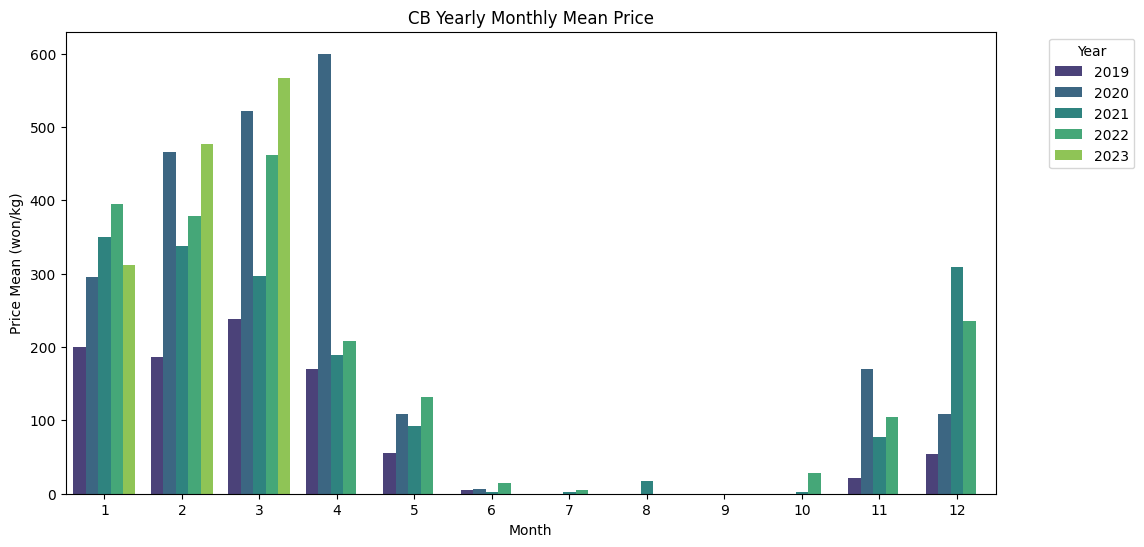

In [ ]:
# CB 품목에 대한 2019년부터 2023년까지의 데이터 선택
cb_data = train_data[(train_data['item'] == 'CB') & (train_data['timestamp'].dt.year >= 2019)]

# timestamp에서 연도와 월 정보 추출
cb_data['year'] = cb_data['timestamp'].dt.year
cb_data['month'] = cb_data['timestamp'].dt.month

# 연도별 월별 price(원/kg) 평균 계산
monthly_mean_cb = cb_data.groupby(['year', 'month'])['price(원/kg)'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_cb, ci=None, palette='viridis')
plt.title('CB Yearly Monthly Mean Price')
plt.xlabel('Month')
plt.ylabel('Price Mean (won/kg)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-24-64731d5ef4bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_data['year'] = rd_data['timestamp'].dt.year
<ipython-input-24-64731d5ef4bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_data['month'] = rd_data['timestamp'].dt.month
<ipython-input-24-64731d5ef4bb>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_rd, ci=None, palette='viridis')


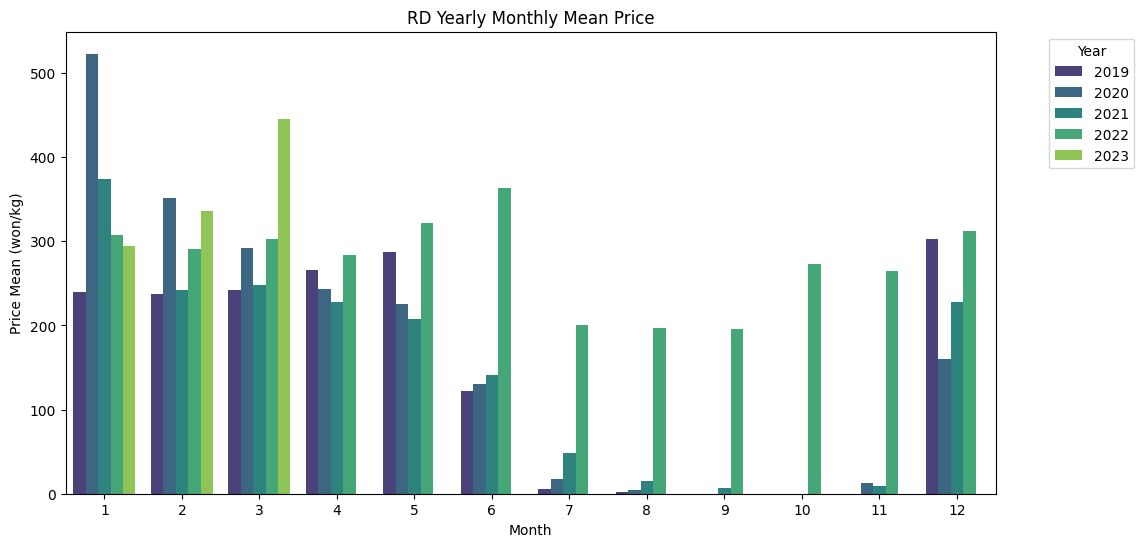

In [ ]:
# RD 품목에 대한 2019년부터 2023년까지의 데이터 선택
rd_data = train_data[(train_data['item'] == 'RD') & (train_data['timestamp'].dt.year >= 2019)]

# timestamp에서 연도와 월 정보 추출
rd_data['year'] = rd_data['timestamp'].dt.year
rd_data['month'] = rd_data['timestamp'].dt.month

# 연도별 월별 price(원/kg) 평균 계산
monthly_mean_rd = rd_data.groupby(['year', 'month'])['price(원/kg)'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_rd, ci=None, palette='viridis')
plt.title('RD Yearly Monthly Mean Price')
plt.xlabel('Month')
plt.ylabel('Price Mean (won/kg)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-25-53e071655fae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data['year'] = bc_data['timestamp'].dt.year
<ipython-input-25-53e071655fae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data['month'] = bc_data['timestamp'].dt.month
<ipython-input-25-53e071655fae>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_bc, ci=None, palette='viridis')


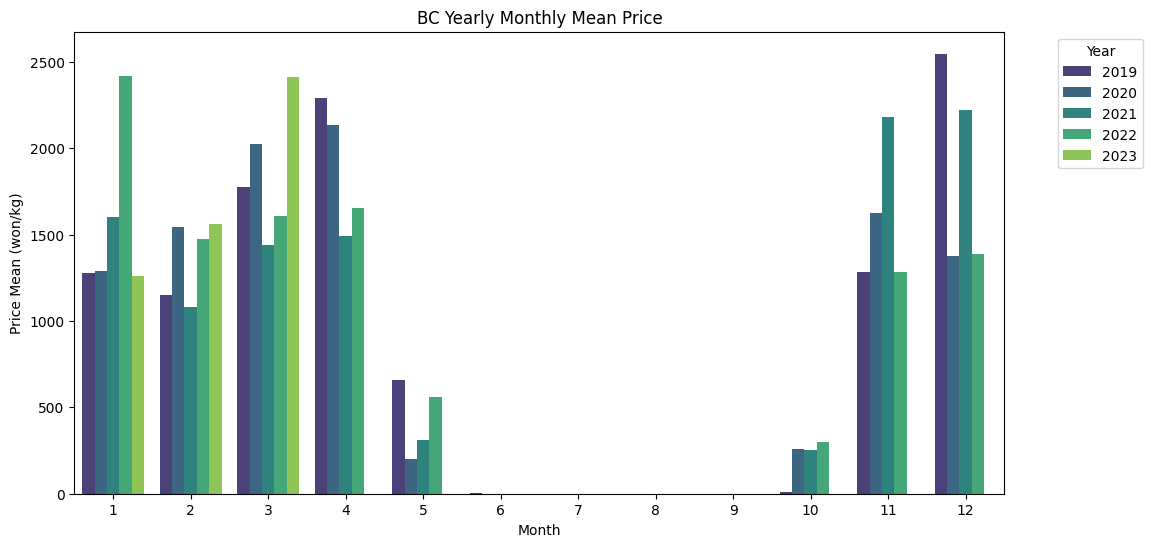

In [ ]:
# BC 품목에 대한 2019년부터 2023년까지의 데이터 선택
bc_data = train_data[(train_data['item'] == 'BC') & (train_data['timestamp'].dt.year >= 2019)]

# timestamp에서 연도와 월 정보 추출
bc_data['year'] = bc_data['timestamp'].dt.year
bc_data['month'] = bc_data['timestamp'].dt.month

# 연도별 월별 price(원/kg) 평균 계산
monthly_mean_bc = bc_data.groupby(['year', 'month'])['price(원/kg)'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='price(원/kg)', hue='year', data=monthly_mean_bc, ci=None, palette='viridis')
plt.title('BC Yearly Monthly Mean Price')
plt.xlabel('Month')
plt.ylabel('Price Mean (won/kg)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# 데이터 불러오기
train_df = pd.read_csv('train.csv')[['ID', 'timestamp', 'supply(kg)', 'price(원/kg)']]
train_df['item_id'] = train_df.ID.str[0:6]

# TimeSeriesDataFrame으로 변환
data = TimeSeriesDataFrame(train_df.drop(columns=['ID']))

# 예측 모델 생성
predictor = TimeSeriesPredictor(
    prediction_length=28,
    target="price(원/kg)",
    eval_metric="RMSE",
)

# seed 고정하여 모델 학습
predictor.fit(data, random_seed=42)

# 모델 재학습
predictor.refit_full()

# seed 고정하여 예측 수행
pred = predictor.predict(data, random_seed=42)

# 예측 결과를 제출 형식에 맞게 저장
submission = pd.read_csv('./sample_submission.csv')
submission['answer'] = pred.reset_index()['mean']
submission.loc[submission['answer'] < 0.0, 'answer'] = 0.0
submission.to_csv('./dacon_submission.csv', index=False)

# CSV 파일로 저장
submission.to_csv('./dacon_submission.csv', index=False)

# 결과 출력
print(submission)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'num_val_windows': 1,
 'prediction_length': 28,
 'random_seed': 42,
 'target': 'price(원/kg)',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 59397 rows, 39 items (item = single time series). Average time series length is 1523.0. Data frequency is 'D'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to AutogluonModels/ag-20231117_021152/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'price(원/kg)'
	past covariates:  ['supply(kg)']


                   ID       answer
0     TG_A_J_20230304  3267.430632
1     TG_A_J_20230305   613.399876
2     TG_A_J_20230306  3062.702166
3     TG_A_J_20230307  3457.144647
4     TG_A_J_20230308  3357.136627
...               ...          ...
1087  RD_F_J_20230327   492.997841
1088  RD_F_J_20230328   516.488705
1089  RD_F_J_20230329   514.444653
1090  RD_F_J_20230330   491.955314
1091  RD_F_J_20230331   477.655817

[1092 rows x 2 columns]


In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# 데이터 불러오기
train_df = pd.read_csv('train.csv')[['ID', 'timestamp', 'supply(kg)', 'price(원/kg)']]
train_df['item_id'] = train_df.ID.str[0:6]

# TimeSeriesDataFrame으로 변환
data = TimeSeriesDataFrame(train_df.drop(columns=['ID']))

# 예측 모델 생성
predictor = TimeSeriesPredictor(
    prediction_length=28,
    target="price(원/kg)",
    eval_metric="RMSE",
)

# 학습
predictor.fit(data)

# 예측 수행
pred = predictor.predict(data)

# 예측 결과를 제출 형식에 맞게 저장
submission = pd.read_csv('./sample_submission.csv')
submission['answer'] = pred.reset_index()['mean']
submission.loc[submission['answer'] < 0.0, 'answer'] = 0.0
submission.to_csv('./dacon_submission.csv', index=False)

# 결과 출력
print(submission)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'num_val_windows': 1,
 'prediction_length': 28,
 'random_seed': None,
 'target': 'price(원/kg)',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 59397 rows, 39 items (item = single time series). Average time series length is 1523.0. Data frequency is 'D'.
AutoGluon will save models to AutogluonModels/ag-20231117_061511/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'price(원/kg)'
	past covariates:  ['supply(kg)']

Starting training. Start time is 2023-11-17 06:15:11
Mod

                   ID       answer
0     TG_A_J_20230304  3290.275172
1     TG_A_J_20230305   742.944516
2     TG_A_J_20230306  3075.512203
3     TG_A_J_20230307  3545.116485
4     TG_A_J_20230308  3372.277397
...               ...          ...
1087  RD_F_J_20230327   528.856878
1088  RD_F_J_20230328   554.528370
1089  RD_F_J_20230329   564.704888
1090  RD_F_J_20230330   533.497948
1091  RD_F_J_20230331   527.609175

[1092 rows x 2 columns]
